In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

(29, 3)


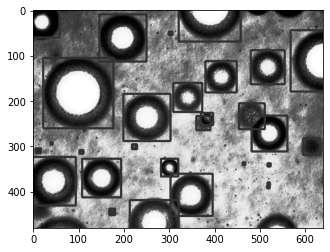

In [2]:
# часть для проверки правильности импорта обучающи данных и отрисовка размеченных вручную сфер на картинке
# загрузка
nameimage = 'image_222.tif'
nametabl = 'image_222.txt'
image=cv2.imread(nameimage)
krugikoor=np.loadtxt(nametabl)
#преобразование изображения в ч/б и выравнивание гистограммы распределения цветов
imageg=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imagegh = cv2.equalizeHist(imageg)
print(krugikoor.shape)

# отрисовка границ сфер
for y,x,d in (krugikoor):
    imagegh=cv2.rectangle(imagegh,(int(x-d/2),int(480-y+d/2)),(int(x+d/2),int(480-y-d/2)),(50),3)

# вывод результата    
plt.imshow(imagegh,cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
#подготовка набора обучающих данных для модели на основе предварительно размеченных автором изображений


imn=0
i=0

# Массив для хранения изображений воздушных сфер в строчном формате 1024=32*32
imagey=np.zeros((61968,1024),dtype='uint8')

# Перечень имеющихся размеченных данных
imgname=({0:'pic0.jpg',1:'pic1.jpg',2:'pic2.jpg',3:'pic3.jpg',4:'pic4.jpg',5:'image_003.tif',6:'image_004.tif',7:'image_005.tif',
    8:'image_006.tif',9:'image_007.tif',10:'image_008.tif',11:'image_011.tif',12:'image_012.tif',13:'image_013.tif',
    14:'image_555.tif',15:'image_015.tif',
    16:'image_016.tif',17:'image_019.tif',18:'image_020.tif',19:'image_021.tif',20:'image_023.tif',21:'image_058.tif',
    22:'image_070.tif',23:'image_079.tif',24:'image_108.tif',25:'image_111.tif',26:'image_222.tif',27:'image_310.tif',
    28:'image_444.tif',29:'image_552.tif'})
txtname=({0:'pic0.txt',1:'pic1.txt',2:'pic2.txt',3:'pic3.txt',4:'pic4.txt',5:'image_003.txt',6:'image_004.txt',7:'image_005.txt',
    8:'image_006.txt',9:'image_007.txt',10:'image_008.txt',11:'image_011.txt',12:'image_012.txt',13:'image_013.txt',
    14:'image_555.txt',15:'image_015.txt',
    16:'image_016.txt',17:'image_019.txt',18:'image_020.txt',19:'image_021.txt',20:'image_023.txt',21:'image_058.txt',
    22:'image_070.txt',23:'image_079.txt',24:'image_108.txt',25:'image_111.txt',26:'image_222.txt',27:'image_310.txt',
    28:'image_444.txt',29:'image_552.txt'})

#Цикл обработки изображений 
while imn<60:
    
    print(imgname[int(imn/2)])
    # простая аугментация - каждое изображение обрабатывается дважды с выравниванием гистограммы распределения цветов и без
    image=cv2.imread(str(imgname[int(imn/2)]))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if int(imn/2)%2==0:
        gray = cv2.equalizeHist(gray)
    gray2=gray.copy()
    koor_sferi=np.loadtxt(str(txtname[int(imn/2)]))
    print(koor_sferi.shape)
    ps=32
    inter=cv2.INTER_AREA


    for y,x,d in (koor_sferi):
        # пропуск слижком маленьких сфер
        if d<8:
            d=8
            print("continue")
            continue
        # определение границ скользящего окна для каждой сферы с учетом размера высоты окна = 1,5d
        a=int(x-0.75*d)
        b=int(x+0.75*d)
        c=int(480-y-0.75*d)
        d=int(480-y+0.75*d)
        # пропуск сфер для которых скользящее окно выходит за пределы изображения
        if a<0:
            a=0
            print("continue")
            continue
            
        if a>640:
            a=640
            print("continue")
            continue
        if b<0:
            b=0
            print("continue")
            continue
        if b>640:
            b=640 
            print("continue")
            continue
        if c<0:
            c=0
            print("continue")
            continue
        if c>480:
            c=480
            print("continue")
            continue
        if d<0:
            d=0
            print("continue")
            continue
        if d>480:
            d=480
            print("continue")
            continue
            

        # сбор в массив изображений отдельных сфер с учетом аугментации (вращение и отражение области)
        imagey[i,:]=np.reshape(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter)))),ps**2)
        i+=1

        imagey[i,:]=np.reshape(np.rot90(np.rot90(np.rot90(np.fliplr(cv2.resize(gray[c:d,a:b],dsize=(ps,ps),interpolation=inter))))),ps**2)
        i+=1
    imn=imn+1
    print(imn)
    print(i)

    print(imagey.shape)




pic0.jpg
(309, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
1
2088
(61968, 1024)
pic0.jpg
(309, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
2
4176
(61968, 1024)
pic1.jpg
(233, 3)
continue
continue
continue
continue
cont

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
21
31824
(61968, 1024)
image_008.tif
(375, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
22
34448
(61968, 1024)
image_011.tif
(150, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue

continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
49
57600
(61968, 1024)
image_108.tif
(53, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
50
57936
(61968, 1024)
image_111.tif
(24, 3)
continue
continue
continue
continue
continue
continue
51
58080
(61968, 1024)
image_111.tif
(24, 3)
continue
continue
continue
continue
continue
continue
52
58224
(61968, 1024)
image_222.tif
(29, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
53
58352
(61968, 1024)
image_222.tif
(29, 3)
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
continue
54
58480
(61968, 1024)
image_310.tif
(51, 3)
continue
continue
continue
continue
continue
continue
continue
55
58832
(61968, 1024)
image_310.tif
(51, 3)
continue
continue
continue
continue
continue
continue
continue
56
59184
(61968, 10

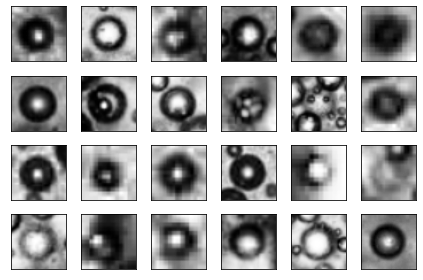

In [4]:
# графическое отражение некоторых из сфер для обучения модели

fig, ax = plt.subplots(nrows=4, ncols=6, sharex= True, sharey = True)
ax=ax.flatten()
for i in range(24):
    img = cv2.resize(imagey[i*1000+700,:].reshape(32,32),dsize=(48,48))
    ax[i].imshow(img,cmap=plt.get_cmap('gray'))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
fig.savefig('fig1.jpg')
plt.show()

In [5]:
#Обработка данных для картинок с "не" воздушными сферами
#Если в дальнейшем не будет хватать оперативной памяти увеличить параметр step
kk=0
imn=0
nbol=0
# перечень картинок
imgname=({0:'pic0.jpg',1:'pic1.jpg',2:'pic2.jpg',3:'pic3.jpg',4:'pic4.jpg',5:'image_003.tif',6:'image_004.tif',7:'image_005.tif',
    8:'image_006.tif',9:'image_007.tif',10:'image_008.tif',11:'image_011.tif',12:'image_012.tif',13:'image_013.tif',
    14:'image_555.tif',15:'image_015.tif',
    16:'image_016.tif',17:'image_019.tif',18:'image_020.tif',19:'image_021.tif',20:'image_023.tif',21:'image_058.tif',
    22:'image_070.tif',23:'image_079.tif',24:'image_108.tif',25:'image_111.tif',26:'image_222.tif',27:'image_310.tif',
    28:'image_444.tif',29:'image_552.tif'})
txtimgname=({0:'pic0.txt',1:'pic1.txt',2:'pic2.txt',3:'pic3.txt',4:'pic4.txt',5:'image_003.txt',6:'image_004.txt',7:'image_005.txt',
    8:'image_006.txt',9:'image_007.txt',10:'image_008.txt',11:'image_011.txt',12:'image_012.txt',13:'image_013.txt',
    14:'image_555.txt',15:'image_015.txt',
    16:'image_016.txt',17:'image_019.txt',18:'image_020.txt',19:'image_021.txt',20:'image_023.txt',21:'image_058.txt',
    22:'image_070.txt',23:'image_079.txt',24:'image_108.txt',25:'image_111.txt',26:'image_222.txt',27:'image_310.txt',
    28:'image_444.txt',29:'image_552.txt'})

imagen=np.zeros((6000000,1024),dtype='uint8')

while imn<60:

    print(imgname[int(imn/2)])
    # простая аугментация - каждое изображение обрабатывается дважды с выравниванием гистограммы распределения цветов и без
    image=cv2.imread(str(imgname[int(imn/2)]))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if int(imn/2)%2==0:
        gray = cv2.equalizeHist(gray)
    gray2=gray.copy()
    koor_sferi=np.loadtxt(str(txtname[int(imn/2)]))
    print(koor_sferi.shape)

    inter=cv2.INTER_AREA
    
        
    
    #размер изображения не сферы после обработки
    ps=32
    # размер скользящего окна до сжатия
    ws=192
    # шаг движения скользящего окна
    step=48
    # цикл изменения шага и размера окна и сбор изображений не сфер
    for c in range(7):
        ws=int(ws/1.5)
        
        step=int(step/1.3)
        istep=step
        jstep=step
        print('ps=',ws)
        print('step=',step)


        Ni,Nj = ws,ws
        for i in range(istep,image.shape[0]-Ni-istep,int(istep)):
            for j in range(jstep,image.shape[1]-Nj-jstep,int(jstep)):
                bol=True
                for y,x,d in (koor_sferi):
                    a=int(x-0.75*d)
                    c=int(480-y-0.75*d)
                    #условие проверки что вырезанное скользящим окном изображение не попадает на сферу с отклонением размера 10%
                    if d>int(ws/1.5/1.1) and d<int(ws/1.5/0.9) and abs(c-i)<int(ws/1.5/10) and abs(a-j)<int(ws/1.5/10):
                        bol=False
                        nbol=1+nbol
                        print('popal')
                if bol:
                    #if kk>1000+imn*2380:
                        #break
                    imagen[kk,:]=np.reshape(cv2.resize(gray[i:i+Ni,j:j+Nj],dsize=(ps,ps),interpolation=inter),ps**2)
                    kk=kk+1
        print(kk)
        print(imagen.shape)
    
    
    
    print(kk) 
    print(imn,'new')
    print(nbol)
    imn=imn+1
    print(imagen.shape)

pic0.jpg
(309, 3)
ps= 128
step= 36
104
(6000000, 1024)
ps= 85
step= 27
351
(6000000, 1024)
ps= 56
step= 20
911
(6000000, 1024)
ps= 37
step= 15
2003
(6000000, 1024)
ps= 24
step= 11
4163
(6000000, 1024)
ps= 16
step= 8
popal
popal
8417
(6000000, 1024)
ps= 10
step= 6
16348
(6000000, 1024)
16348
0 new
2
(6000000, 1024)
pic0.jpg
(309, 3)
ps= 128
step= 36
16452
(6000000, 1024)
ps= 85
step= 27
16699
(6000000, 1024)
ps= 56
step= 20
17259
(6000000, 1024)
ps= 37
step= 15
18351
(6000000, 1024)
ps= 24
step= 11
20511
(6000000, 1024)
ps= 16
step= 8
popal
popal
24765
(6000000, 1024)
ps= 10
step= 6
32696
(6000000, 1024)
32696
1 new
4
(6000000, 1024)
pic1.jpg
(233, 3)
ps= 128
step= 36
32800
(6000000, 1024)
ps= 85
step= 27
33047
(6000000, 1024)
ps= 56
step= 20
33607
(6000000, 1024)
ps= 37
step= 15
34699
(6000000, 1024)
ps= 24
step= 11
popal
36858
(6000000, 1024)
ps= 16
step= 8
41114
(6000000, 1024)
ps= 10
step= 6
49045
(6000000, 1024)
49045
2 new
5
(6000000, 1024)
pic1.jpg
(233, 3)
ps= 128
step= 36
49149

393253
(6000000, 1024)
ps= 37
step= 15
394345
(6000000, 1024)
ps= 24
step= 11
396505
(6000000, 1024)
ps= 16
step= 8
400761
(6000000, 1024)
ps= 10
step= 6
408692
(6000000, 1024)
408692
24 new
58
(6000000, 1024)
image_012.tif
(126, 3)
ps= 128
step= 36
408796
(6000000, 1024)
ps= 85
step= 27
409043
(6000000, 1024)
ps= 56
step= 20
409603
(6000000, 1024)
ps= 37
step= 15
410695
(6000000, 1024)
ps= 24
step= 11
412855
(6000000, 1024)
ps= 16
step= 8
417111
(6000000, 1024)
ps= 10
step= 6
425042
(6000000, 1024)
425042
25 new
58
(6000000, 1024)
image_013.tif
(110, 3)
ps= 128
step= 36
425146
(6000000, 1024)
ps= 85
step= 27
425393
(6000000, 1024)
ps= 56
step= 20
popal
425952
(6000000, 1024)
ps= 37
step= 15
427044
(6000000, 1024)
ps= 24
step= 11
429204
(6000000, 1024)
ps= 16
step= 8
433460
(6000000, 1024)
ps= 10
step= 6
441391
(6000000, 1024)
441391
26 new
59
(6000000, 1024)
image_013.tif
(110, 3)
ps= 128
step= 36
441495
(6000000, 1024)
ps= 85
step= 27
441742
(6000000, 1024)
ps= 56
step= 20
popal
4423

803069
(6000000, 1024)
ps= 24
step= 11
805229
(6000000, 1024)
ps= 16
step= 8
809485
(6000000, 1024)
ps= 10
step= 6
817416
(6000000, 1024)
817416
49 new
84
(6000000, 1024)
image_111.tif
(24, 3)
ps= 128
step= 36
popal
817519
(6000000, 1024)
ps= 85
step= 27
817766
(6000000, 1024)
ps= 56
step= 20
818326
(6000000, 1024)
ps= 37
step= 15
819418
(6000000, 1024)
ps= 24
step= 11
821578
(6000000, 1024)
ps= 16
step= 8
825834
(6000000, 1024)
ps= 10
step= 6
833765
(6000000, 1024)
833765
50 new
85
(6000000, 1024)
image_111.tif
(24, 3)
ps= 128
step= 36
popal
833868
(6000000, 1024)
ps= 85
step= 27
834115
(6000000, 1024)
ps= 56
step= 20
834675
(6000000, 1024)
ps= 37
step= 15
835767
(6000000, 1024)
ps= 24
step= 11
837927
(6000000, 1024)
ps= 16
step= 8
842183
(6000000, 1024)
ps= 10
step= 6
850114
(6000000, 1024)
850114
51 new
86
(6000000, 1024)
image_222.tif
(29, 3)
ps= 128
step= 36
popal
850217
(6000000, 1024)
ps= 85
step= 27
850464
(6000000, 1024)
ps= 56
step= 20
851024
(6000000, 1024)
ps= 37
step= 15
8

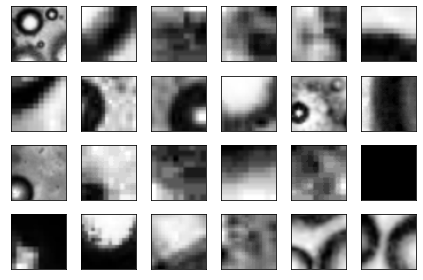

In [6]:
# графическое отражение некоторых изображений не сфер для обучения модели
fig, ax = plt.subplots(nrows=4, ncols=6, sharex= True, sharey = True)
ax=ax.flatten()
for i in range(24):
    img = cv2.resize(imagen[i*15000+500,:].reshape(32,32),dsize=(48,48))
    ax[i].imshow(img,cmap=plt.get_cmap('gray'))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
fig.savefig('fig2.jpg')
plt.show()

In [7]:
import pickle
#формирование и сохранение массива данных для последующего обучения моделей
imall=np.vstack((imagey,imagen[:980902,:]))
yy=np.zeros(imall.shape[0])
yy[:(len(imagey))]=1

filename='data'
pickle.dump((imall,yy), open(filename, 'wb'))